In [23]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The first metric is called Centre of gravity and it is defined as

\begin{equation}
    CG=\frac{\Sigma_{i=1}^N \mu_i}{N max_i\{\mu_i\}}
\end{equation}
Where <br>
&emsp;$\mu_i=$maximum chain length linking species i to basal species;<br>
&emsp;$N=$Number of species.

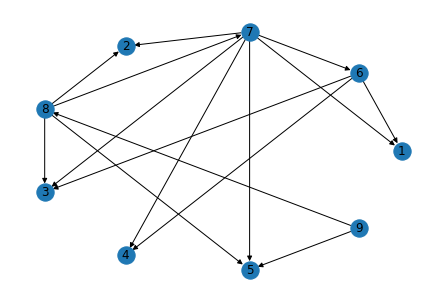

In [308]:
#BFM graph: 9 nodes, 5 basal groups, 3 self loops (cannibals)


G= nx.DiGraph([(1,6),(1,7),(2,7),(2,8),(3,6),(3,7),(3,8),(4,6),(4,7),(5,7),(5,8),(5,9),(6,6),
            (6,7),(7,7),(7,8),(8,8),(8,9)])
G=G.reverse()#To compute the paths edges need to start from predator and go towards preys
#Let's show the graph just to visualize it
nx.draw_circular(G,with_labels=True)

In [309]:
#Define a dictionary with basal nodes (e.g. primary producers and bacteria)
d={'basal':{1,2,3,4,5},'non-basal':{6,7,8,9}}

In [310]:
def CG(G,d):
   l=list(G.nodes())
   sorted(l)
   sh=list()
   shl=list()
   for i in d['non-basal']:
      for j in d['basal']:
        if nx.has_path(G, source=i, target=j):
                shl.append(nx.shortest_path_length(G,source=i,target=j))
                #sh.append(nx.shortest_path(G,source=i,target=j))
        else:
             shl.append(0)
   shspl=np.array_split(shl, len(d['non-basal']))
   mu=list()
   for k in shspl:
        mu.append(max(k))    

    
   N=G.number_of_nodes()
   cg=sum(mu)/(N*max(mu))
   return cg
CG(G,d)

0.37037037037037035

The second metric is called Average trophic level and it is defined as
\begin{equation}
ATL=\frac{\sum_{i=N}^N (1+\chi_i)}{N}
\end{equation}
Where<br>
&emsp;$\chi_i=$the average chain length of all food chains linking species $i=1,...,N$ to basal species


In [ ]:
def ATL(G):
    tl= nx.trophic_levels(G)
    atl=np.average(np.fromiter(tl.values(), dtype=float))
    return atl